# EXPLORATORY DATA ANALYSIS - M4 HOURLY DATASET

This notebook is aimed to do a exploratory data analysis on The Dataset

# About Dataset

M4 Data contains 961 Hourly Time Series and the starting and the ending of the data is actually left unkown. M4 Dataset was made in December 28th, 2017 by Prof Markidakis from randomly selected 100.000 Continuous Hourly Time Series Data from varios business realm. This is why in dataset we have no observation of the date_time information, but we know that all Time Series has hourly freq. But it is important to know that the start and the end hourly Time Series Data might not be the same. Therefor, we will treat this M4 Dataset as Multiple Univariate Time Series.
It is also important to mention that the dataset itself has been preprocessed so that the data has range of min 10 and has no negative observation.

for full explaination about dataset, please refer to this Journal: https://www.sciencedirect.com/science/article/pii/S0169207019301128



# Load Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/Time-Series/LSTM/Multiple Time Series Forecasting

/content/drive/MyDrive/Colab Notebooks/Time-Series/LSTM/Multiple Time Series Forecasting


In [5]:
# load and see dataset
df = pd.read_csv("raw_data.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,H410,153.0,196.0,163.0,131.0,82.0,53.0,57.0,54.0,46.0,...,132.0,165.0,191.0,186.0,119.0,108.0,70.0,72.0,79.0,77.0
410,H411,24.0,30.0,22.0,14.0,19.0,20.0,24.0,45.0,38.0,...,122.0,195.0,166.0,154.0,132.0,76.0,66.0,67.0,51.0,42.0
411,H412,19.0,30.0,12.0,16.0,13.0,15.0,15.0,21.0,21.0,...,111.0,166.0,225.0,278.0,144.0,71.0,70.0,73.0,39.0,36.0
412,H413,21.0,16.0,17.0,19.0,16.0,22.0,21.0,15.0,23.0,...,77.0,91.0,76.0,68.0,68.0,59.0,58.0,53.0,38.0,46.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Columns: 961 entries, V1 to V961
dtypes: float64(960), object(1)
memory usage: 3.0+ MB


# Data Preprocessings

## Drop Columns V1

In [7]:
df.drop(columns = "V1", inplace=True)

## Replace Column Name

In [8]:
df.columns = [f"V{i}" for i in range(1, len(df.columns) + 1)]

In [9]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V951,V952,V953,V954,V955,V956,V957,V958,V959,V960
0,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,1713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

When dealing with Multiple Time Series Data, it is important to note that:
1. All Time Series Data must have same freqencies, starting, and ending date
2. All Time Series Data must be continuous, not a intermitent Time Series and has no missing values
3. It is preferable to standardize Time Series Data within the same magnitude

Due to the massive amount of Time Series Data we have, and we will attempt to solve it using Deep Learning Apporches like Using Model like LSTM, TFT, and N-Beats. we will do only a simple Time Series Analysis that could be beneficial to have an intiution and to keep everything in simple.
Some Analysis that we can do are:
1. Analysis of Missing Values
2. Analysis of Seasonality
3. Analysis of Time Series Correlations with Other Time Series

## Plot Data

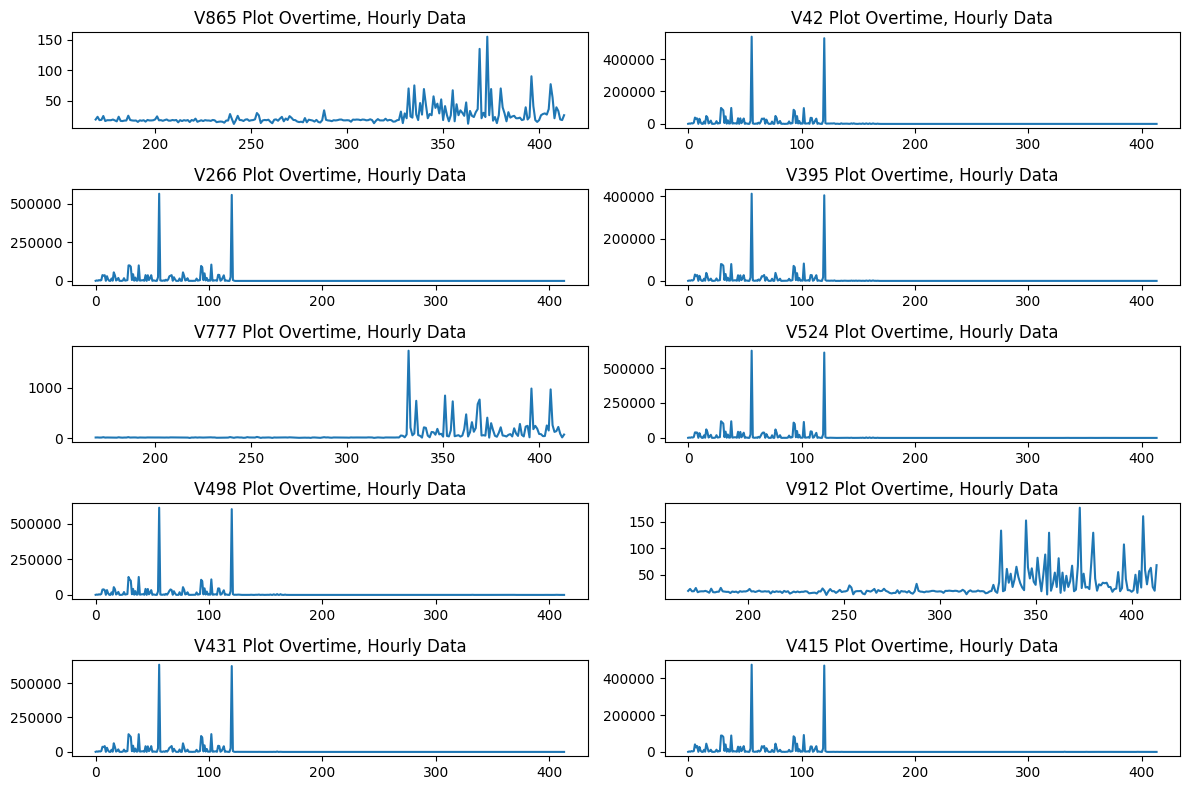

In [21]:
# generate 10 random numbers
# specify random seed
seed = 0
random.seed(seed)

# take 10 random numbers between 1 and 960
random_series = random.sample(range(1, 961), 10)
random_series = [f'V{i}' for i in random_series]
random_series

# plot random 10 data
fig, ax = plt.subplots(5,2, figsize=(12, 8))

for i, col in enumerate(random_series):
  ax[i%5, i%2].plot(df[col])
  ax[i%5, i%2].set_title(f"{col} Plot Overtime, Hourly Data")

plt.tight_layout()


It's pretty interesting that Time Series V42, V266, V395, V77, V524, V498, V431, and V415 has identical pattern. And also for Time Series V865, V777, and V912 also has identical pattern. Using this 10 Time Series samples, it seems that Time Series could be categorized as 2 classes Time Series.

But, this time series, despite it might has strong correlations, its seems to be challenging to predict. Because from the plot, seems the time series pattern might looks akward. for one group its start as a flat pattern and bumping around wildly. and for for another group its starts with regular pattern with seasonality than the pattern starts to be flat time series around 0. if this pattern formed naturally from its time series (was not made by filling NaN with values in the preprocessing step of raw dataset) than this strange pattern make this time series hard to predict.

## Plot Missing Values

Text(0.5, 1.0, 'Missing Values Plot')

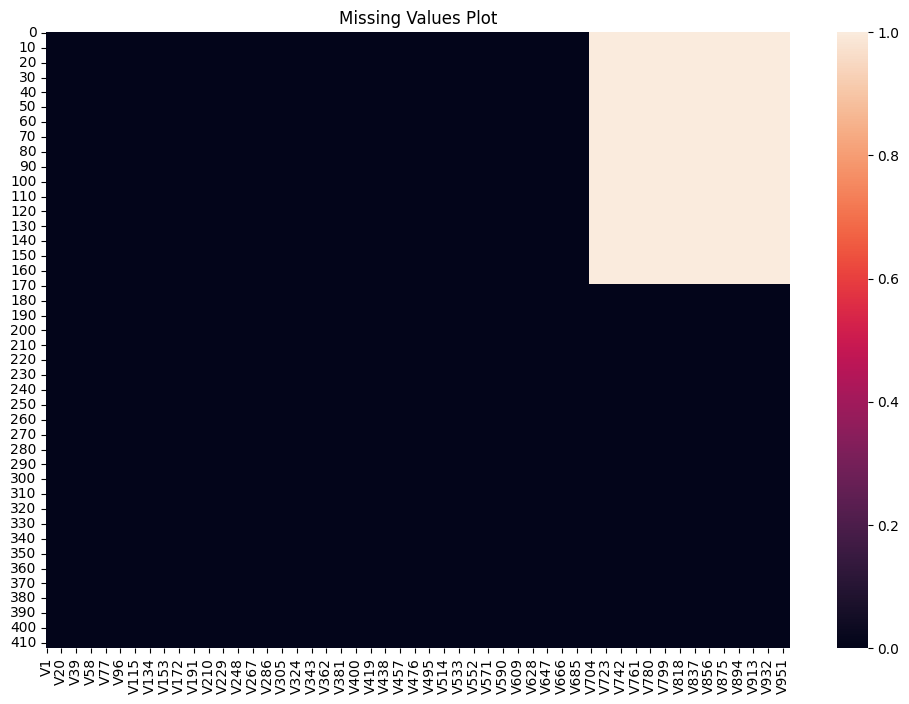

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))

# plot missing values
# white equals to has missing values
sns.heatmap(df.isna(),
            cbar = 'Greys',
            ax=ax)

plt.title("Missing Values Plot")

In [24]:
# see all time series that has missing values
df.isna().any()[df.isna().any() == True].index

Index(['V701', 'V702', 'V703', 'V704', 'V705', 'V706', 'V707', 'V708', 'V709',
       'V710',
       ...
       'V951', 'V952', 'V953', 'V954', 'V955', 'V956', 'V957', 'V958', 'V959',
       'V960'],
      dtype='object', length=260)

In [25]:
columns_not_nan = [i for i in df.columns if i not in df.isna().any()[df.isna().any() == True].index]
len(columns_not_nan)

700

**Insight:**

Time Seires V701 to V960, all have a lot of missing values. By looking at the graph, we can clearly see that almost a half of data is missing.

## Seasonality Plotting

### Creating Dummy Time Data

In [26]:
# defined starting date
date_start = pd.to_datetime("2017-12-28 00:00:00")

# create datetime index using pandas.date_range
datetime = pd.date_range(start = date_start,
                         periods = len(df),
                         freq = 'h')

# setting index of datetime to df
df = df.set_index(datetime)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V951,V952,V953,V954,V955,V956,V957,V958,V959,V960
2017-12-28 00:00:00,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28 01:00:00,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,1713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28 02:00:00,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,1108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28 03:00:00,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,4227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28 04:00:00,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,2275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plotting Preparations

In [27]:
# create function to plot seasonality

def plot_seasonality(data,
                     freq = "h"):


  # standardize values
  data = (df - np.mean(df, axis = 0)) / np.std(df, axis = 0)

  # granulate data
  if freq == "h":
    data = data.groupby(data.index.hour).mean()
    xlabel = "Hour To -"
    flag = "Hourly Plot"
  elif freq == "d":
    data = data.groupby(data.index.dayofweek).mean()
    xlabel = "Days to -"
    flag = "Daily Plot"
  else:
    print("Invalid Frequency. Valid Freq are: 'h' and 'd'")
    return

  # plot results
  fig, ax = plt.subplots(1,1, figsize=(12, 8))
  ax.plot(data, marker = "o")
  plt.grid()
  plt.title(f"{flag} Seasonality Plot")
  plt.xlabel(xlabel)
  plt.ylabel("Average Values")
  plt.show();

### Hourly Seasonality Plotting

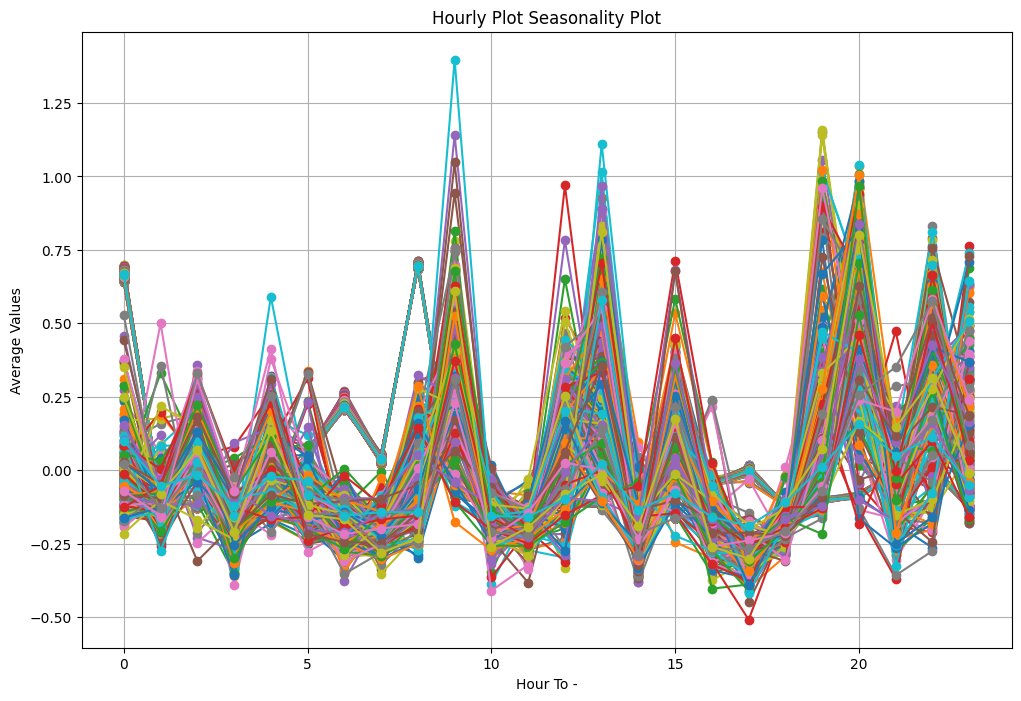

In [28]:
plot_seasonality(df);

### Daily Seasonality Plotting

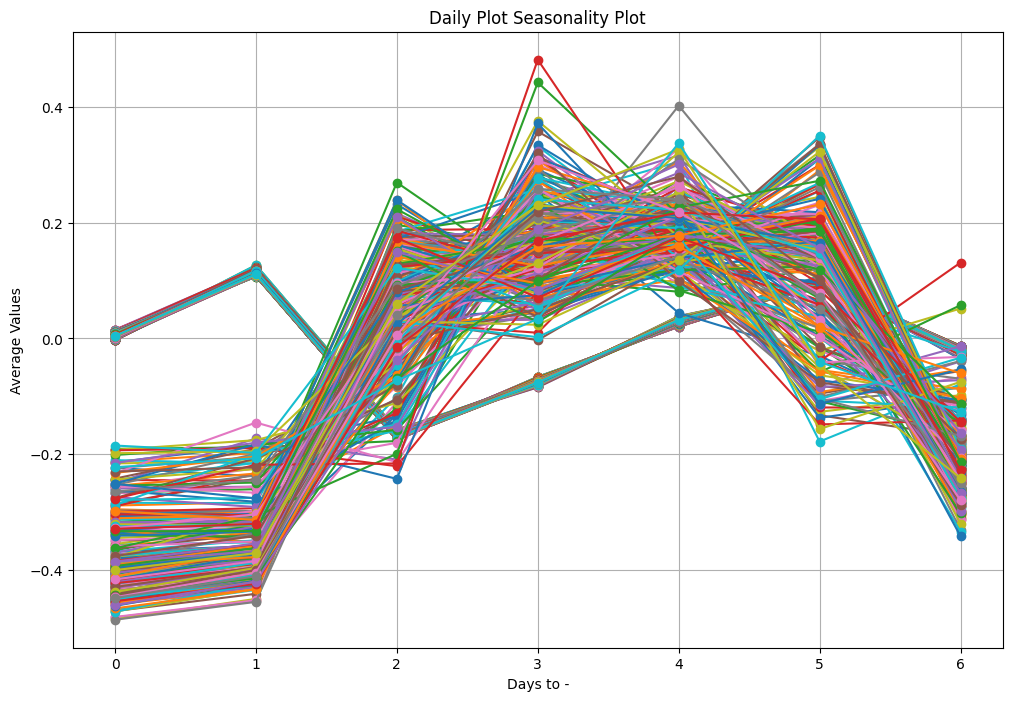

In [29]:
plot_seasonality(df, freq="d");

## Correlation Matrix Plot

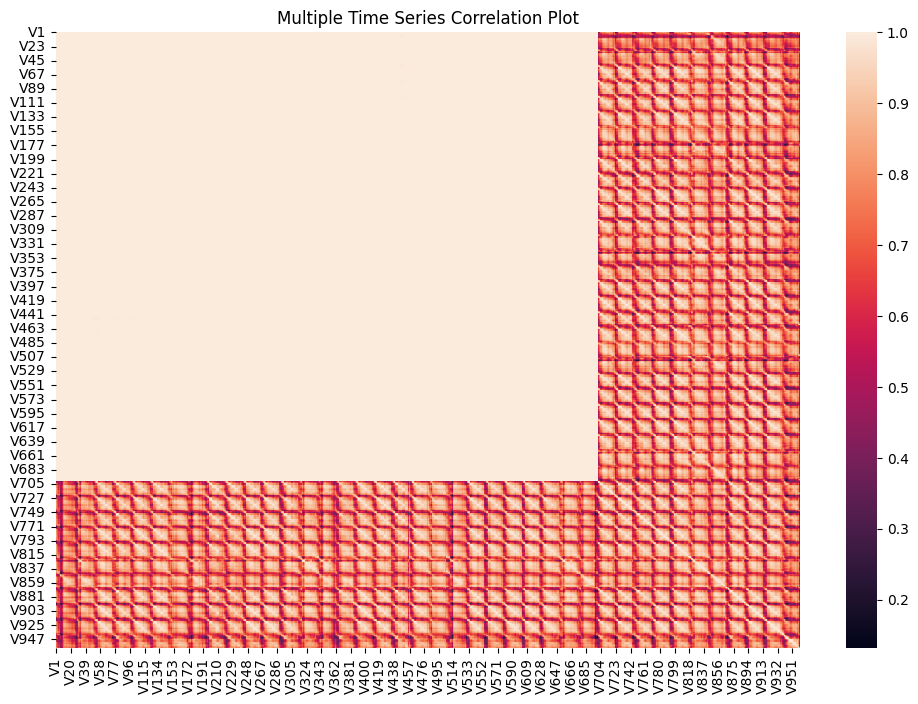

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))

sns.heatmap(df.corr(), ax=ax)

plt.title("Multiple Time Series Correlation Plot")

plt.show();

As we expect, a lot of correlation occurs from one time series to others time series, especially time series V1 to v700 seems to have high correlations. The rest have various correlations score from around 0.2 up to around 0.9 (Aproximate).
And also, from previous 10 samples, it seems that Time Series is Divided into 2 segments that has almost same identical Pattern. The Groups that might be relevants are:
1. group 1, V1 until V699
2. group 2, V700 until V960

In [31]:
# save data with dropped index
df.to_csv("preprocessed_data.csv", index=False)